<a href="https://colab.research.google.com/github/peppehermes/colab/blob/main/risparmioforo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamboli

In [41]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn
from datetime import datetime
from matplotlib.ticker import MaxNLocator

<ipython-input-41-1ed6d3a4c08f>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [42]:
lista={"MSCI USA":"https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/NET/EUR/LARGE_AND_MID_CAP/COUNTRIES/MSCI%20USA.csv",
 "MSCI Europe":"https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/NET/EUR/LARGE_AND_MID_CAP/REGIONS/MSCI%20EUROPE.csv",
 "MSCI Emerging Asia":"https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/NET/EUR/LARGE_AND_MID_CAP/REGIONS/MSCI%20EM%20ASIA.csv",
 "MSCI World":"https://raw.githubusercontent.com/paolocole/Stock-Indexes-Historical-Data/main/NET/EUR/LARGE_AND_MID_CAP/REGIONS/MSCI%20WORLD.csv",
  "Gold Spot":"https://raw.githubusercontent.com/AxelFooley/Market-Indexes-Historical-Data/main/Gold-Spot.csv"}

dati={}
for nome in lista.keys():
  dato=pd.read_csv(lista[nome])
  print("\n"+nome)
  print(dato.iloc[:,1].pct_change(12).describe())
  dati[nome]=dato



MSCI USA
count    284.000000
mean       0.078899
std        0.180555
min       -0.405395
25%       -0.008967
50%        0.095027
75%        0.195189
max        0.480247
Name: USA, dtype: float64

MSCI Europe
count    284.000000
mean       0.058190
std        0.183306
min       -0.437690
25%       -0.063136
50%        0.095155
75%        0.180827
max        0.531722
Name: EUROPE, dtype: float64

MSCI Emerging Asia
count    260.000000
mean       0.099963
std        0.219275
min       -0.531884
25%       -0.025135
50%        0.088911
75%        0.229136
max        0.734873
Name: EM ASIA, dtype: float64

MSCI World
count    284.000000
mean       0.070279
std        0.176151
min       -0.393967
25%       -0.016887
50%        0.086533
75%        0.188740
max        0.495063
Name: WORLD, dtype: float64

Gold Spot
count    526.000000
mean       0.066761
std        0.214695
min       -0.309202
25%       -0.059966
50%        0.029384
75%        0.152960
max        1.629259
Name: Gold spot price

# Risparmioforo

In [43]:
risparmio = 500
aumento_risparmio = 0.00
indice = "MSCI World"
aliquota = 0.26
bollo = 0.002
anni = [10,20,30,40,50]

In [44]:
rendimenti_mensili = list(dati[indice].iloc[:,1].pct_change(1).iloc[1:])
aumento_risparmio_mensile = (1+aumento_risparmio)**(1/12)-1
mese = 0
quanti_mesi = anni[-1]*12
calcolo = np.zeros((quanti_mesi,len(rendimenti_mensili)))
calcolo[0] = 0.
versamenti = np.zeros(quanti_mesi)
versamenti[0] = risparmio
calcolo[0,:] = versamenti[0]
for mese in range(1,quanti_mesi):
  versamenti[mese] = versamenti[mese-1]*(1+aumento_risparmio_mensile)

for mese in range(1,quanti_mesi):
  versamenti[mese] = versamenti[mese] - ( calcolo[mese-1,simulazione] * bollo if mese%12==0 else 0 )
  for simulazione in range(len(rendimenti_mensili)):
    quale_simulazione = (simulazione+mese) % len(rendimenti_mensili)
    calcolo[mese,simulazione] = versamenti[mese] + calcolo[mese-1,simulazione]*(1+rendimenti_mensili[quale_simulazione])


In [45]:
calcolo

array([[5.00000000e+02, 5.00000000e+02, 5.00000000e+02, ...,
        5.00000000e+02, 5.00000000e+02, 5.00000000e+02],
       [1.00342920e+03, 1.02949984e+03, 1.03027431e+03, ...,
        1.01813720e+03, 1.01138257e+03, 1.02824010e+03],
       [1.56263121e+03, 1.59183464e+03, 1.50685892e+03, ...,
        1.54131523e+03, 1.56850565e+03, 1.53529219e+03],
       ...,
       [2.75513715e+06, 2.69675987e+06, 2.86364442e+06, ...,
        2.70976504e+06, 2.85956065e+06, 2.73577467e+06],
       [2.70626001e+06, 2.87458109e+06, 3.07341383e+06, ...,
        2.86817120e+06, 2.74722042e+06, 2.76723193e+06],
       [2.88470590e+06, 3.08514974e+06, 3.33737783e+06, ...,
        2.75549119e+06, 2.77880719e+06, 2.71813803e+06]])

10 anni: versato 59  -  min 44  media 79  max 117


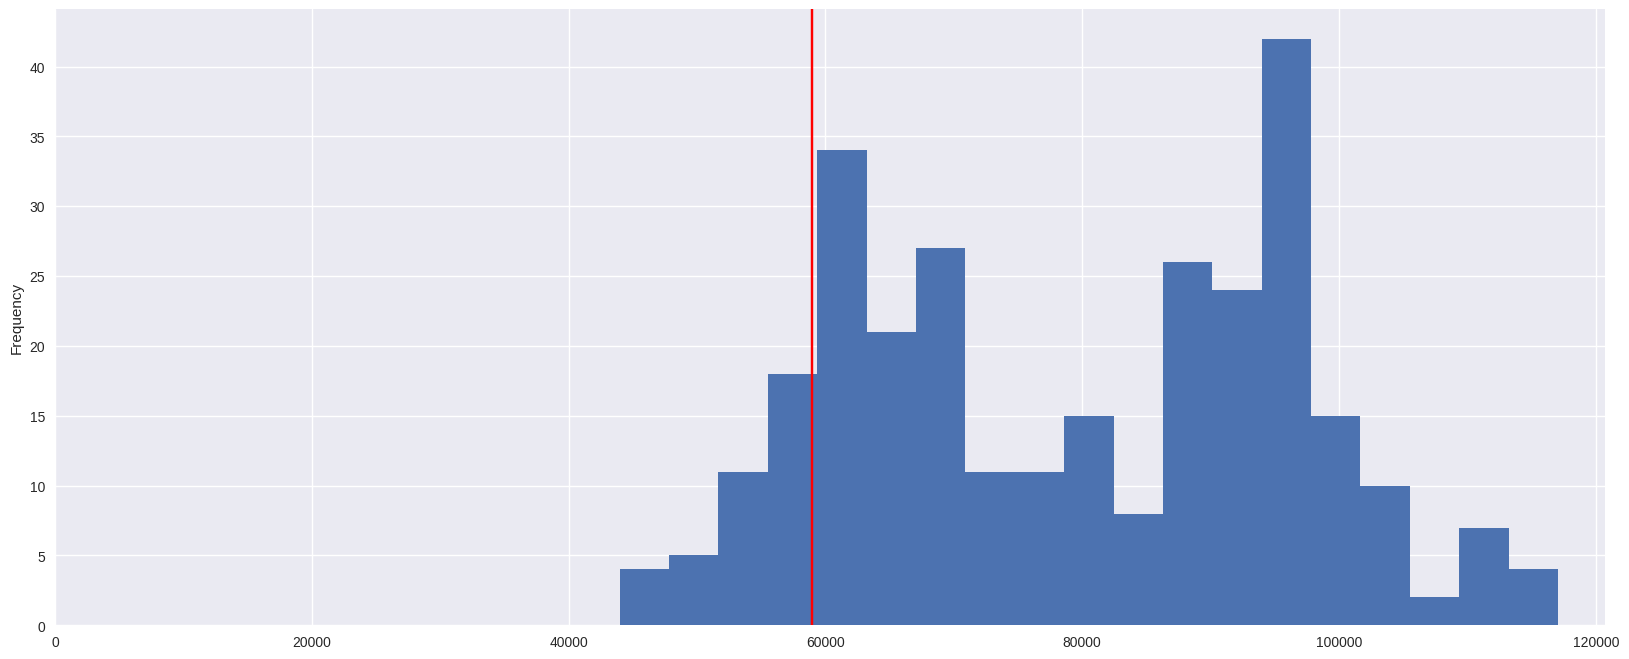

20 anni: versato 116  -  min 111  media 213  max 390


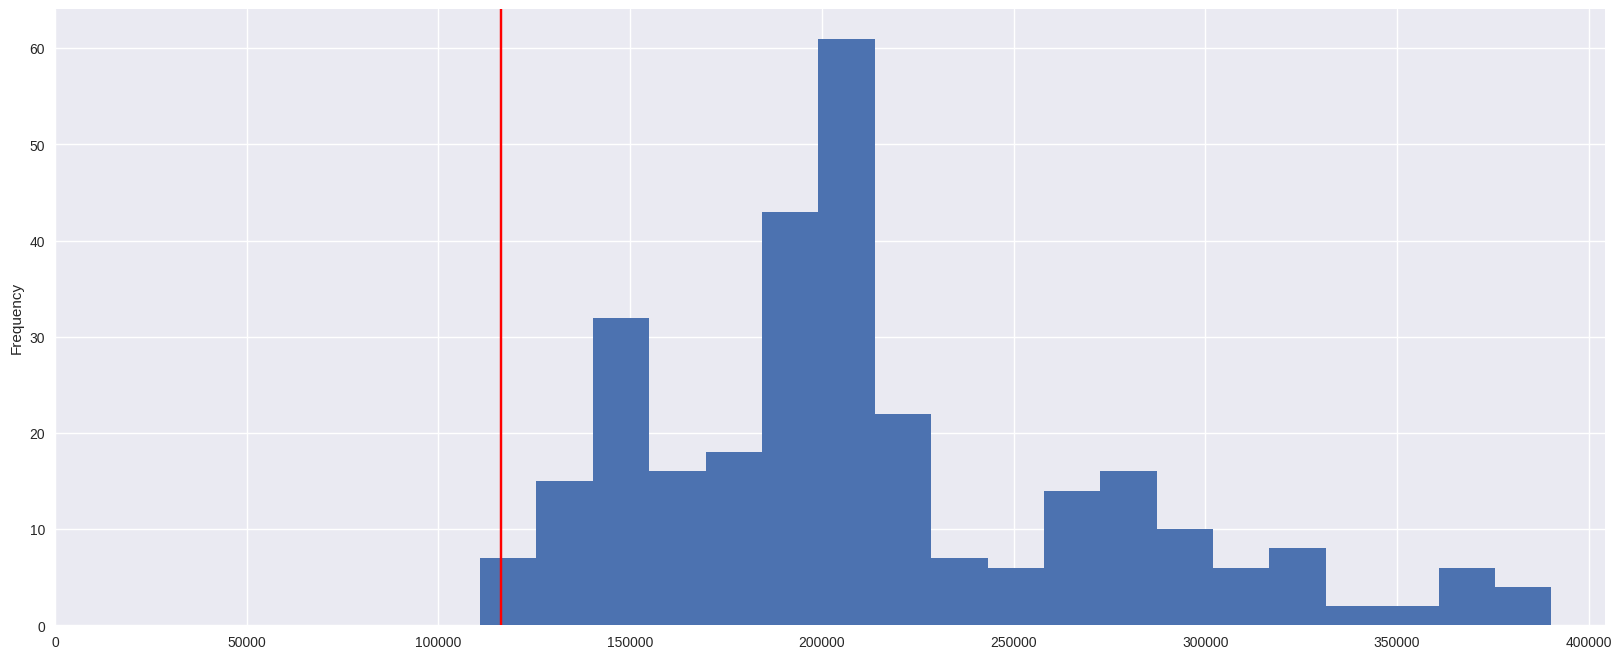

30 anni: versato 168  -  min 245  media 425  max 710


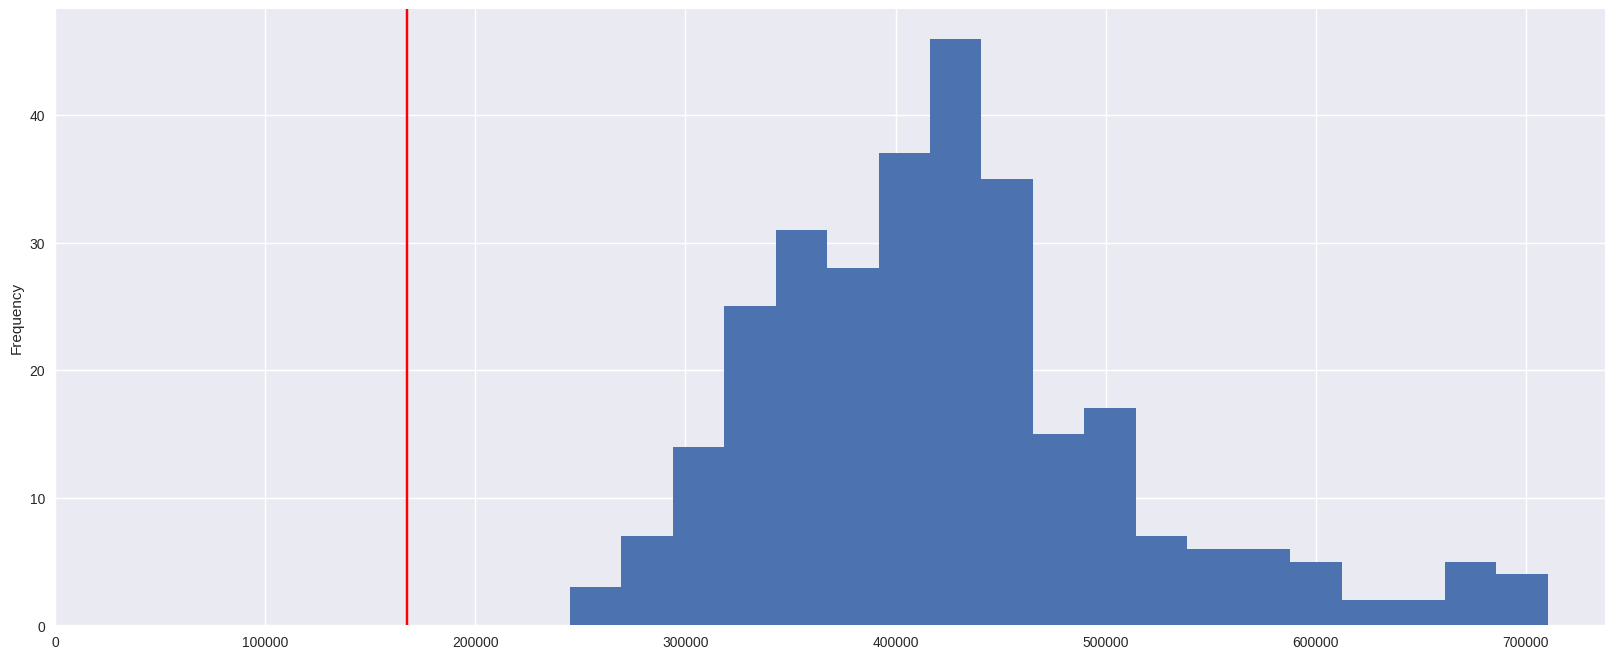

40 anni: versato 216  -  min 402  media 824  max 1513


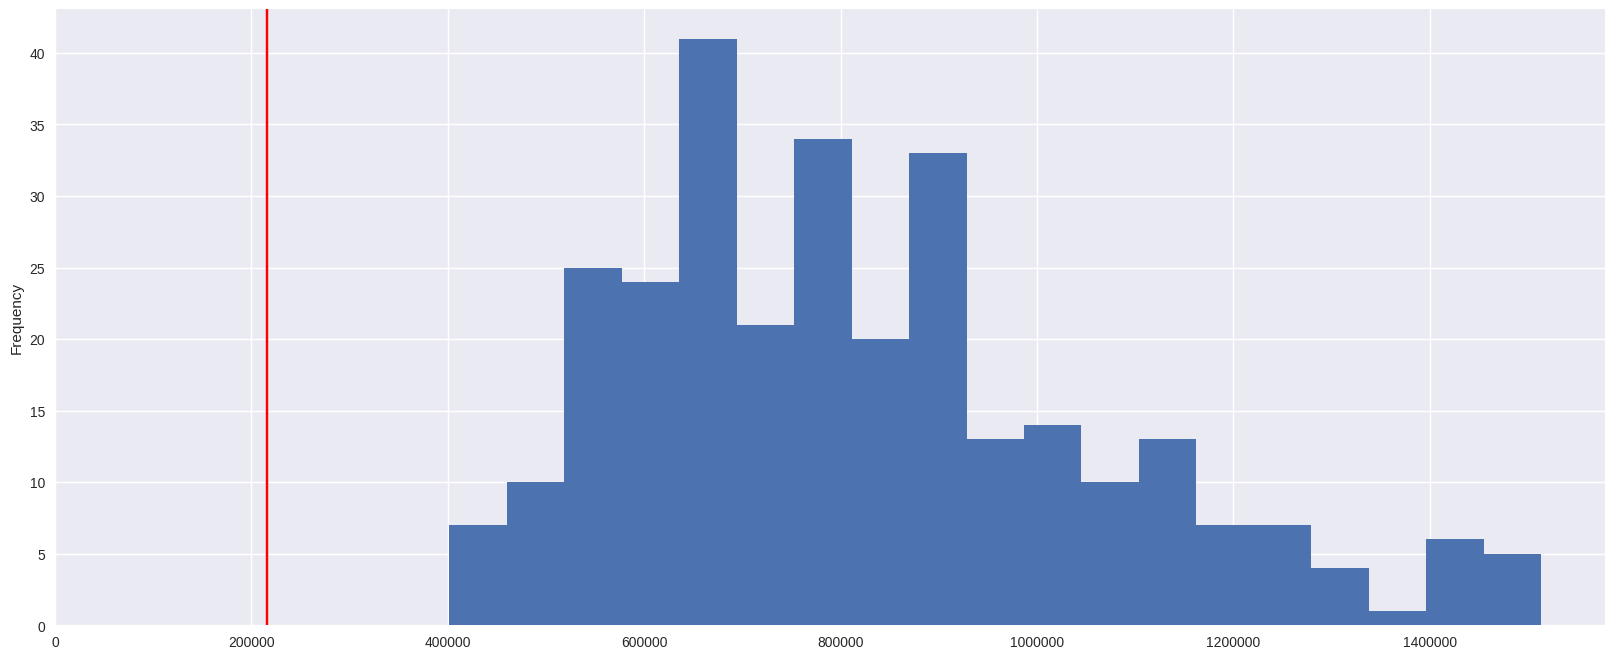

50 anni: versato 247  -  min 816  media 1481  max 2721


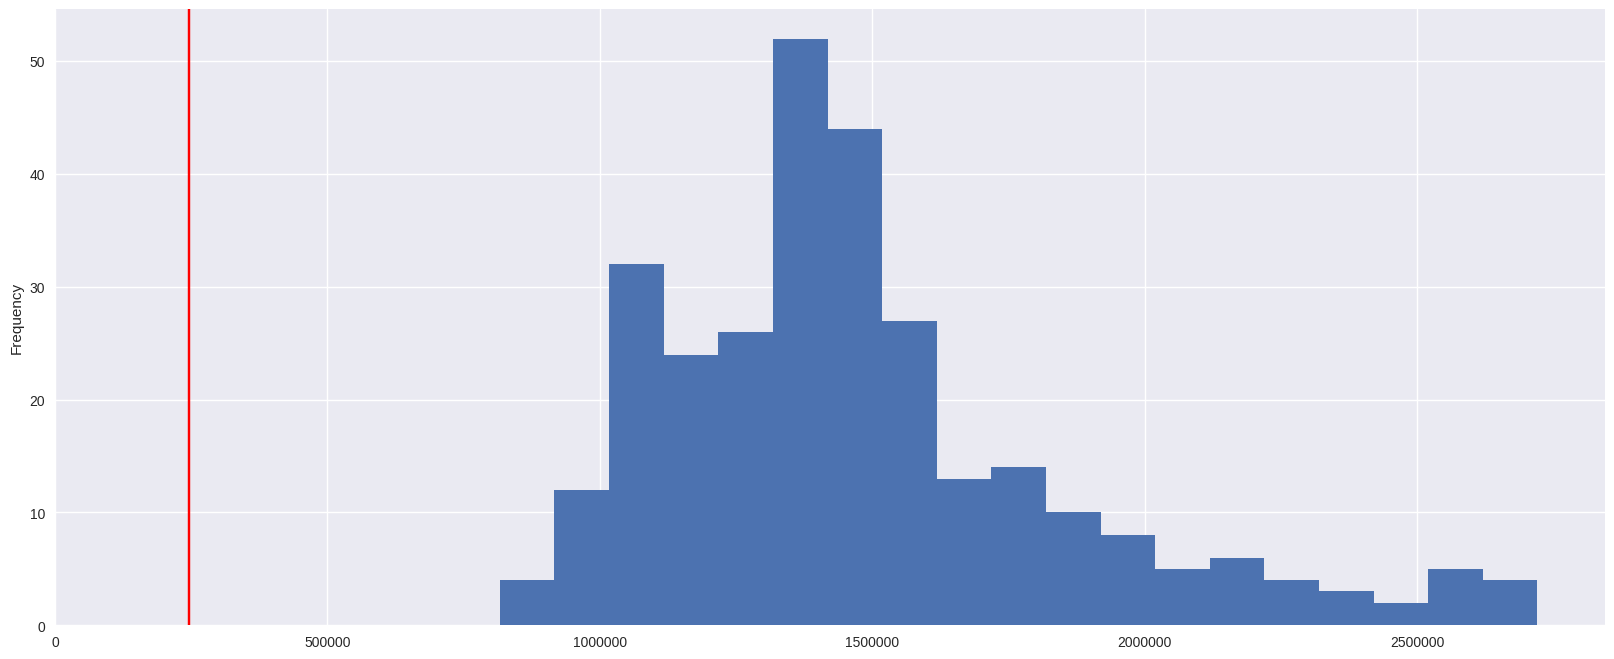

In [46]:
for anno in anni:
  print(str(anno)+" anni", end=": ")
  c = calcolo[anno*12-1]
  v = sum(versamenti[:anno*12-1])
  tassa = ( c - v ) * aliquota
  netto = c - tassa
  print("versato",round(v/1000)," - ","min",round(netto.min()/1000)," media",round(netto.mean()/1000)," max",round(netto.max()/1000))
  pd.DataFrame(netto).plot(kind="hist",legend=None,bins=int(len(netto)/15),figsize=(20,8))
  plt.axvline(x = v, color = 'r', label = 'versato')
  plt.xlim(xmin=0)
  plt.ticklabel_format(style='plain')
  plt.show()

# Risparmioforo con inflazione

In [47]:
risparmio = 500
aumento_risparmio = 0.03
indice = "MSCI World"
aliquota = 0.26
bollo = 0.002
anni = [10,20,30,40,50]
inflazione_stima = "reale riscalata" # fissa, reale, reale riscalata, lognormale
inflazione_stimata = 0.03

In [48]:
rendimenti_mensili = list(dati[indice].iloc[:,1].pct_change(1).iloc[1:])
aumento_risparmio_mensile = (1+aumento_risparmio)**(1/12)-1
mese = 0
quanti_mesi = anni[-1]*12
calcolo = np.zeros((quanti_mesi,len(rendimenti_mensili)))
calcolo[0] = 0.
versamenti = np.zeros(quanti_mesi)
versamenti[0] = risparmio
for mese in range(1,quanti_mesi):
  versamenti[mese] = versamenti[mese-1]*(1+aumento_risparmio_mensile)

for mese in range(1,quanti_mesi):
  versamenti[mese] = versamenti[mese] - ( calcolo[mese-1,simulazione] * bollo if mese%12==0 else 0 )
  for simulazione in range(len(rendimenti_mensili)):
    quale_simulazione = (simulazione+mese) % len(rendimenti_mensili)
    calcolo[mese,simulazione] = versamenti[mese] + calcolo[mese-1,simulazione]*(1+rendimenti_mensili[quale_simulazione])

In [49]:
quante_simulazioni = 200
# sistemiamo l'inflazione
inflazione_reale = np.array([2.3,3.4,1.3,2.8,-0.4,2.3,2.1,4.7,7.5,5.9,4.6,2.3,3.7,1.4,2.6,5.0,4.8,5.7,10.8,19.1,17.0,16.8,17.0,12.1,14.8,
                             21.2,17.8,16.5,14.7,10.8,9.2,5.8,4.8,5.0,6.3,6.5,6.2,5.3,4.7,4.1,5.3,4.0,2.0,2.0,1.7,2.5,2.7,2.5,2.7,2.2,1.9,
                             2.1,1.8,3.3,0.8,1.5,2.7,3.0,1.2,0.2,0.1,-0.1,1.2,1.2,0.6,-0.2,1.9,8.1,8.7])/100
if inflazione_stima == "fissa":
    inflazione = np.ones((anni[-1],len(rendimenti_mensili),quante_simulazioni))*inflazione_stimata
elif inflazione_stima == "reale":
    inflazione = inflazione_reale[np.random.randint(0,len(inflazione_reale),(anni[-1],len(rendimenti_mensili),quante_simulazioni))]
elif inflazione_stima == "reale riscalata":
    inflazione = (inflazione_reale*(inflazione_stimata/inflazione_reale.mean()))[np.random.randint(0,len(inflazione_reale),(anni[-1],len(rendimenti_mensili),quante_simulazioni))]
elif inflazione_stima == "lognormale":
    mu = np.log(inflazione_stimata)
    sigma = np.log((1+np.sqrt(1+4*inflazione_reale.var()/np.exp(2*mu)))/2)
    mu = np.log(inflazione_stimata)-sigma**2/2
    sigma = np.log((1+np.sqrt(1+4*inflazione_reale.var()/np.exp(2*mu)))/2)
    mu = np.log(inflazione_stimata)-sigma**2/2
    inflazione = np.random.lognormal(mean=mu,sigma=sigma,size=(anni[-1],len(rendimenti_mensili),quante_simulazioni))
else:
    print("Ciccio, guarda che non so come gestire l'inflazione!")
    inflazione = np.array[inflazione_stimata,inflazione_stimata,inflazione_stimata]
print("Media:",inflazione.mean(),"Dev st:",inflazione.std())
print(inflazione.shape)
#inflazione

Media: 0.03000466562535206 Dev st: 0.029183046059013534
(50, 295, 200)


10 anni: versato medio 60  -  min 28  media 68  max 119


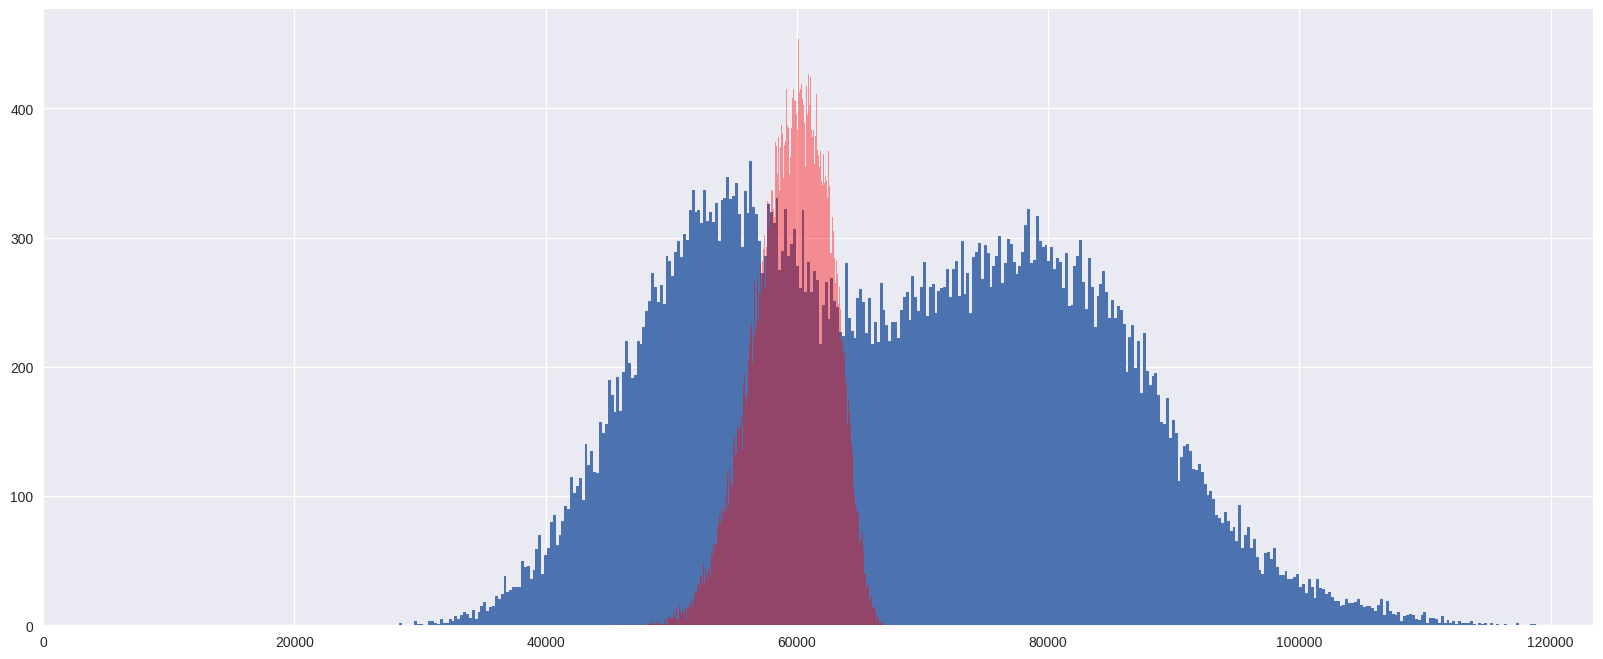

20 anni: versato medio 118  -  min 56  media 155  max 384


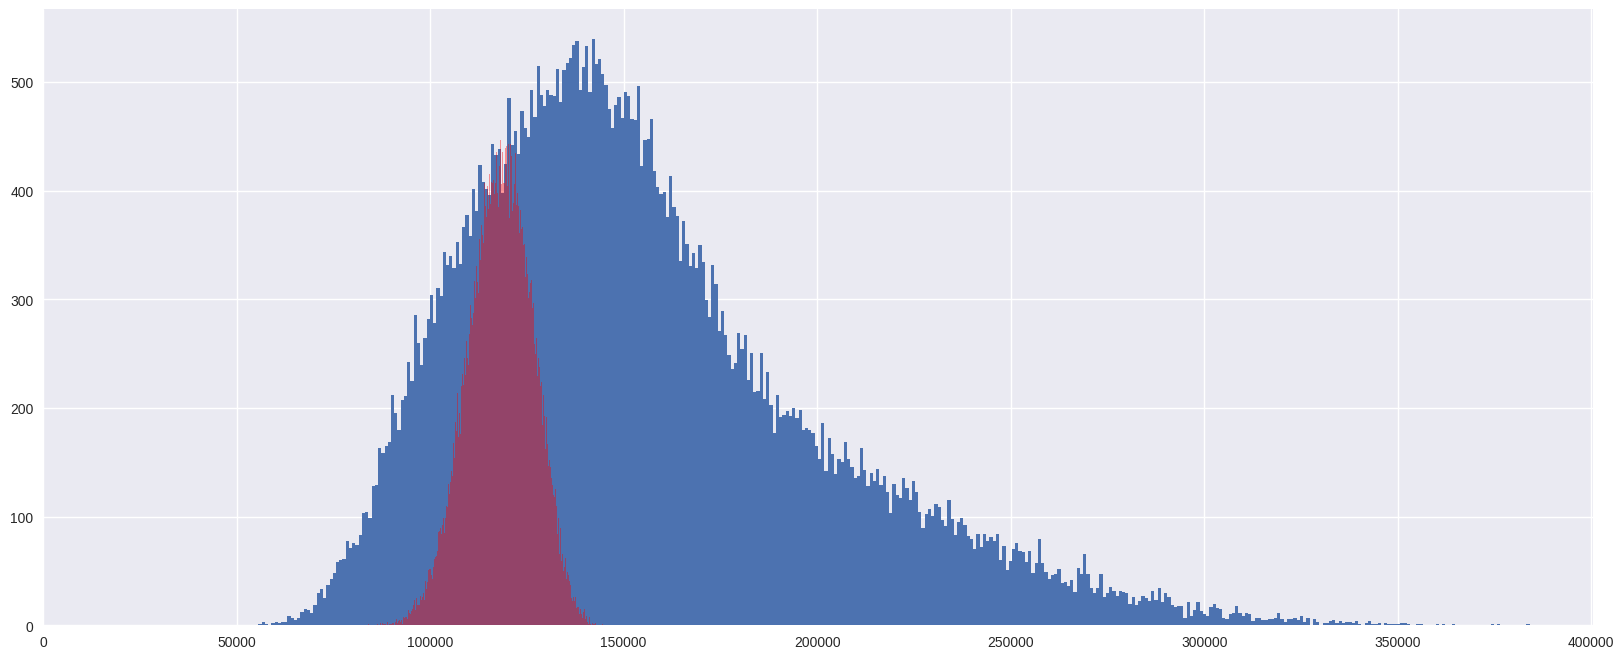

30 anni: versato medio 173  -  min 90  media 257  max 638


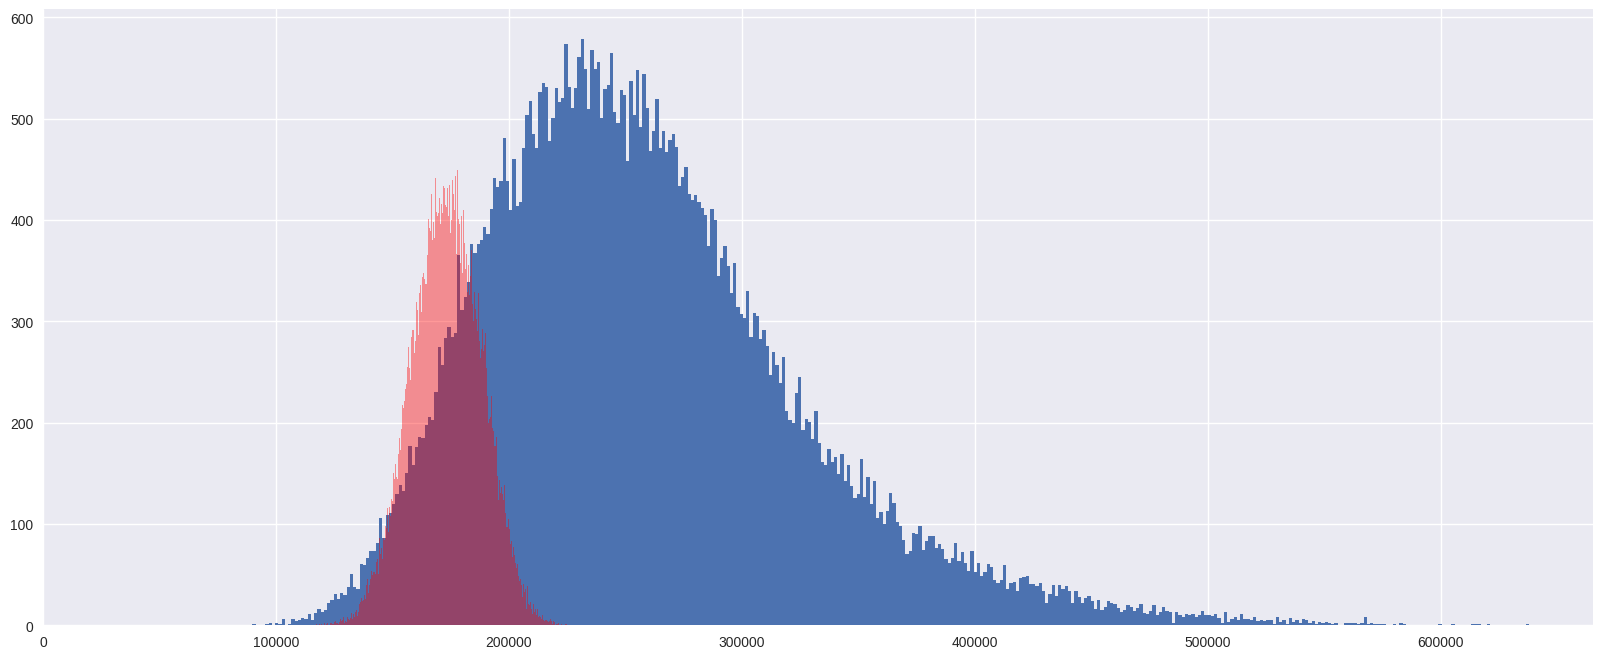

40 anni: versato medio 229  -  min 110  media 403  max 1169


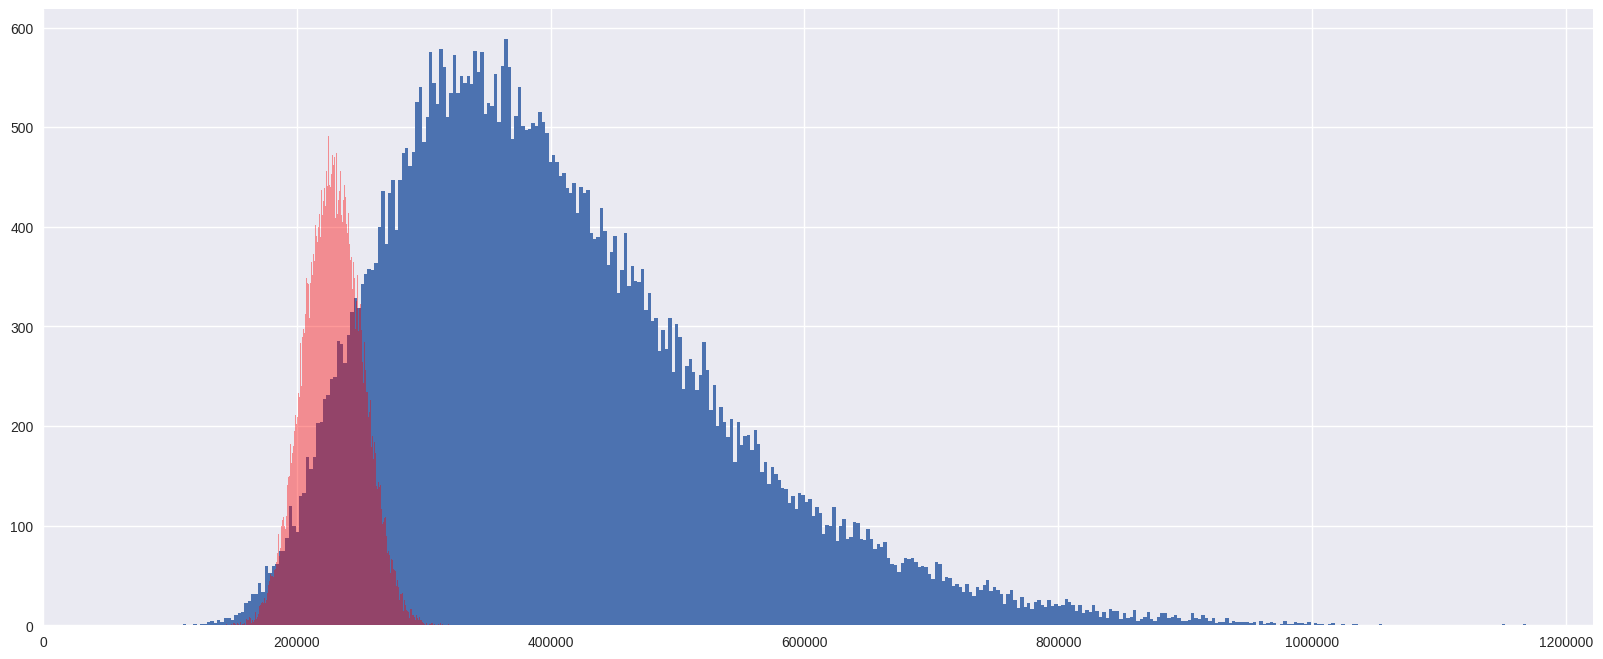

50 anni: versato medio 278  -  min 160  media 585  max 1860


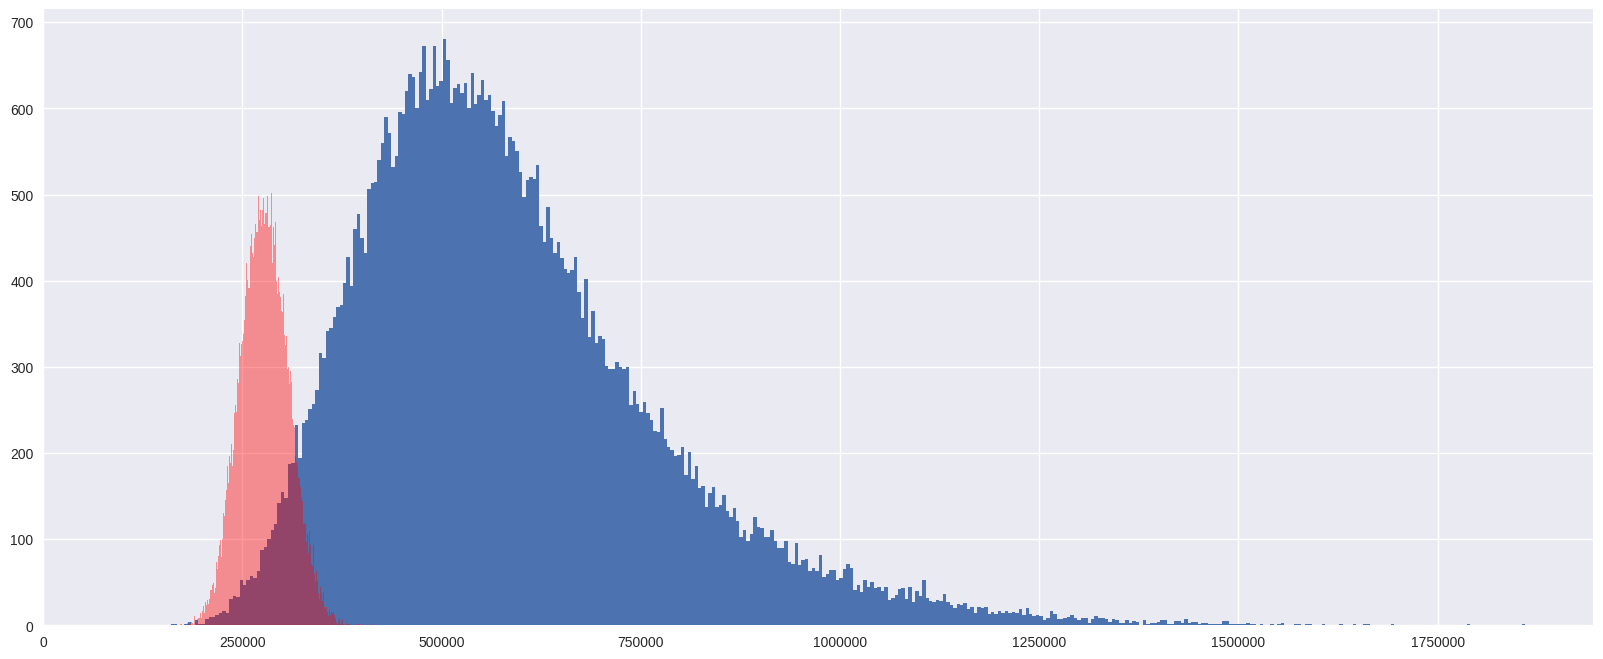

In [50]:
for anno in anni:
  print(str(anno)+" anni", end=": ")
  c = calcolo[anno*12-1]
  v = sum(versamenti[:anno*12-1])
  tassa = ( c - v ) * aliquota
  netto = c - tassa

  inflazione_fino_anno = np.ones((len(rendimenti_mensili),quante_simulazioni))
  for i in range(anno):
    inflazione_fino_anno = inflazione_fino_anno*(1+inflazione[i,:,:])

  matriciona = np.expand_dims(netto, axis=-1) / inflazione_fino_anno
  netto = np.reshape(matriciona,matriciona.shape[0]*matriciona.shape[1])

  v = np.zeros(inflazione.shape[1]*inflazione.shape[2])
  inflazione_finora = np.ones((inflazione.shape[1]*inflazione.shape[2]))
  for a in range(anno):
    inflazione_mensile = ( np.reshape(inflazione[a,:,:],(inflazione.shape[1]*inflazione.shape[2])) + 1 ) ** (1/12)
    for m in range(12):
      inflazione_finora *= inflazione_mensile
      v = v + versamenti[m+a*12] / inflazione_finora

  print("versato medio",round(v.mean()/1000)," - ","min",round(netto.min()/1000)," media",round(netto.mean()/1000)," max",round(netto.max()/1000))
  plt.figure(figsize=(20,8))
  if inflazione_stima == "fissa":
    plt.hist(pd.DataFrame(netto),bins=int(len(netto)/1500))
    plt.axvline(x = v[0], color = 'r', label = 'versato')
  else:
    plt.hist(pd.DataFrame(netto),bins=int(len(netto)/150))
    plt.hist(pd.DataFrame(v),bins=int(len(v)/150),color='r',alpha=0.4)
  plt.xlim(xmin=0)
  plt.ticklabel_format(style='plain')
  plt.show()